In [1]:
import pandas as pd

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4.0           4

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [3]:
# Impute missing values for numerical columns
numerical_cols = ["user/ageInSeconds", "user/birthdayUnix"]
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Using median for numerical columns

# Impute missing values for categorical columns
categorical_cols = ["user/gender", "user/profileName"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Using mode for categorical columns

# Check if missing values are handled
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

df['review/text'].fillna('Missing', inplace=True)



Missing values after imputation:
 index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds        0
user/birthdayRaw     29644
user/birthdayUnix        0
user/gender              0
user/profileName         0
dtype: int64


In [4]:
# Drop the "user/birthdayRaw" column
df.drop("user/birthdayRaw", axis=1, inplace=True)
print("Columns after dropping 'user/birthdayRaw':\n", df.columns)


Columns after dropping 'user/birthdayRaw':
 Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayUnix',
       'user/gender', 'user/profileName'],
      dtype='object')


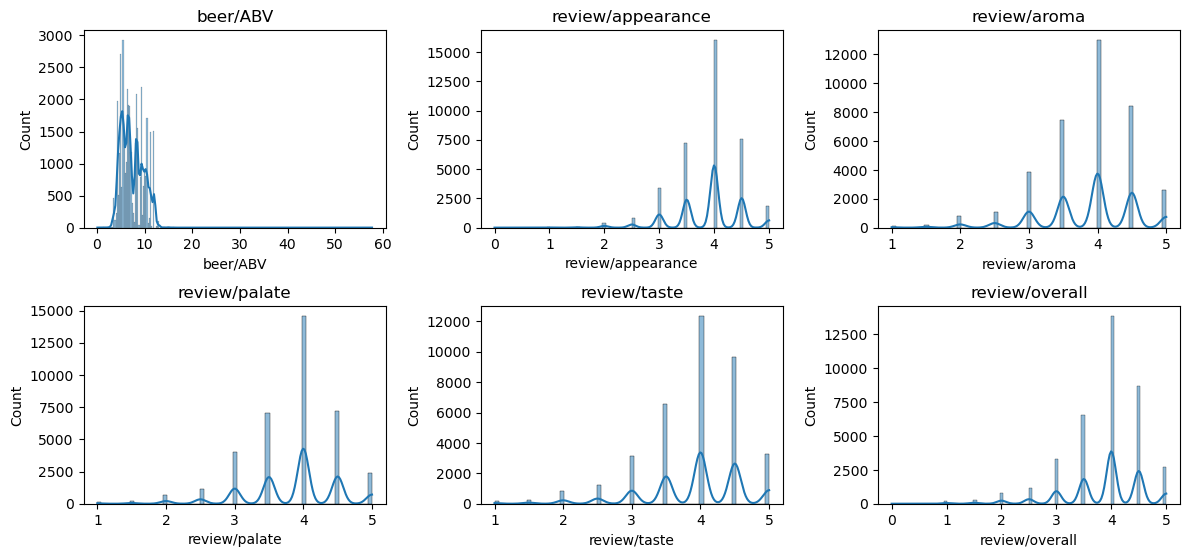

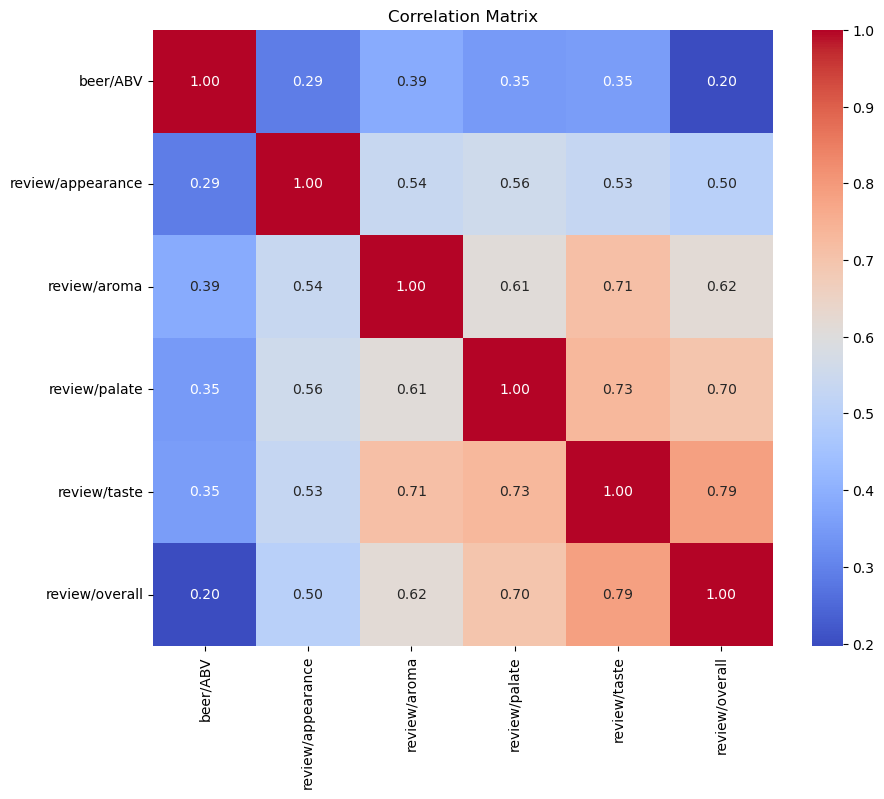

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numerical features
numerical_cols = ["beer/ABV", "review/appearance", "review/aroma", "review/palate", "review/taste", "review/overall"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate correlations between numerical features and target variable
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [6]:
from itertools import combinations

# Create interaction terms for pairs of features
interaction_cols = ['review/appearance', 'review/aroma', 'review/palate', 'review/taste']
for col1, col2 in combinations(interaction_cols, 2):
    interaction_name = f"{col1}_x_{col2}"
    df[interaction_name] = df[col1] * df[col2]

# Check the updated dataframe
print(df.head())


   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  ...  user/ageInSeconds user/birthdayUnix use

In [7]:
import pandas as pd

# Convert review time from Unix timestamp to datetime
df['review_time'] = pd.to_datetime(df['review/timeUnix'], unit='s')

# Extract time-based features
df['review_month'] = df['review_time'].dt.month
df['review_year'] = df['review_time'].dt.year
df['review_dayofweek'] = df['review_time'].dt.dayofweek

# Check the updated dataframe
print(df.head())


   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  ...  review/appearance_x_review/aroma  \
0  

In [8]:
# Display the first few rows of the dataset
print(df.head())

# Check the columns of the dataset
print(df.columns)

# Check for any missing values
print(df.isnull().sum())


   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  ...  review/appearance_x_review/aroma  \
0  

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df['review/text'] = df['review/text'].fillna('')

# Concatenate all review texts into a single string
all_reviews = ' '.join(df['review/text'])

# Tokenize the text into words
tokens = word_tokenize(all_reviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_tokens)

# Print the 10 most common words/phrases
for i in word_freq.most_common(10):
  print(i)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Charvi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


('beer', 46967)
('head', 36402)
('taste', 26155)
('nice', 24583)
('good', 23025)
('malt', 22016)
('like', 21409)
('hops', 21093)
('one', 20811)
('sweet', 20231)


In [10]:
# Create an instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to each review text
df['sentiment_scores'] = df['review/text'].apply(lambda text: sid.polarity_scores(text))

# Extract the compound sentiment score (overall sentiment) from the dictionary
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [11]:
# Classify the reviews as positive, negative, or neutral based on the compound score
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score > 0.3 else ('negative' if score < 0 else 'neutral'))

# Print the DataFrame with the sentiment scores and classification
df[['review/text', 'sentiment_scores', 'compound_score', 'sentiment']].head(10)

,review/text,sentiment_scores,compound_score,sentiment
0,Pours a clouded gold with a thin white head. N...,"{'neg': 0.095, 'neu': 0.82, 'pos': 0.085, 'com...",0.0258,neutral
1,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'neg': 0.104, 'neu': 0.701, 'pos': 0.195, 'co...",0.9390,positive
2,First enjoyed at the brewpub about 2 years ago...,"{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compou...",0.8175,positive
3,First thing I noticed after pouring from green...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.8625,positive
4,A: pours an amber with a one finger head but o...,"{'neg': 0.037, 'neu': 0.799, 'pos': 0.164, 'co...",0.9305,positive
5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'neg': 0.0, 'neu': 0.946, 'pos': 0.054, 'comp...",0.7992,positive
6,my 100th review on-tap! mini snifter\t\t A nut...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.9690,positive
7,One of the better pumpkin ales I've tried so f...,"{'neg': 0.05, 'neu': 0.759, 'pos': 0.19, 'comp...",0.9903,positive
8,A snifter filled (several times over) from a 7...,"{'neg': 0.074, 'neu': 0.73, 'pos': 0.196, 'com...",0.9894,positive
9,"Brewed with five hop additions, this alleged I...","{'neg': 0.054, 'neu': 0.888, 'pos': 0.058, 'co...",0.1107,neutral


In [12]:
sentiment_df = pd.DataFrame(df['sentiment'].value_counts())
sentiment_df.reset_index(inplace=True)
sentiment_df.head(3)

,index,sentiment
0,positive,33833
1,negative,2519
2,neutral,1148


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
Accuracy: 0.7461333333333333
Classification Report:
               precision    recall  f1-score   support

     Average       0.66      0.59      0.62      1974
   Excellent       0.63      0.27      0.38       534
        Good       0.78      0.88      0.83      4507
        Poor       0.75      0.65      0.70       485

    accuracy                           0.75      7500
   macro avg       0.71      0.60      0.63      7500
weighted avg       0.74      0.75      0.73      7500



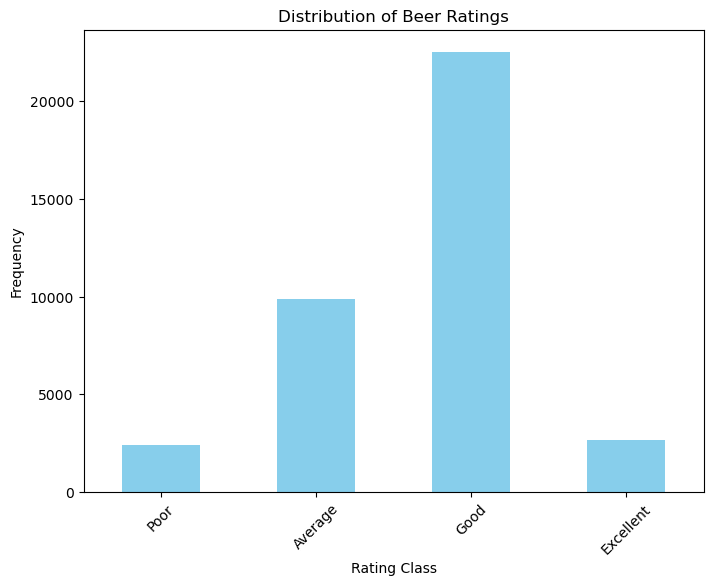

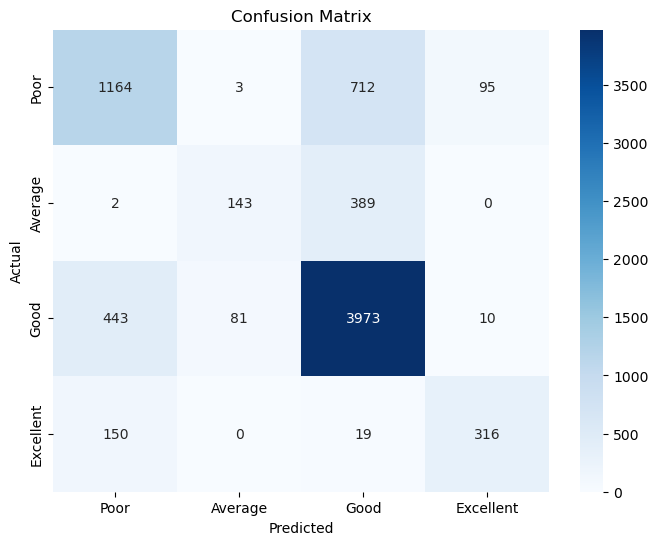

Sample Beer Ratings:
                             beer/name               beer/style  beer/ABV  \
0                             Chiostro     Herbed / Spiced Beer       5.0   
1             Bearded Pat's Barleywine      American Barleywine      11.0   
2                 Naughty Nellie's Ale  American Pale Ale (APA)       4.7   
3                      Pilsner Urquell           Czech Pilsener       4.4   
4            Black Sheep Ale (Special)         English Pale Ale       4.4   
5                      YouEnjoyMyStout   Russian Imperial Stout      10.0   
6                          Benevolence        American Wild Ale      12.6   
7     Frog's Hollow Double Pumpkin Ale              Pumpkin Ale       8.4   
8  Stoudt's Barrel Aged Old Abominable       English Barleywine       9.0   
9                   One Hop Wonder IPA             American IPA       6.2   

   review/overall rating_class  
0             4.0         Good  
1             3.5      Average  
2             3.5      Average  

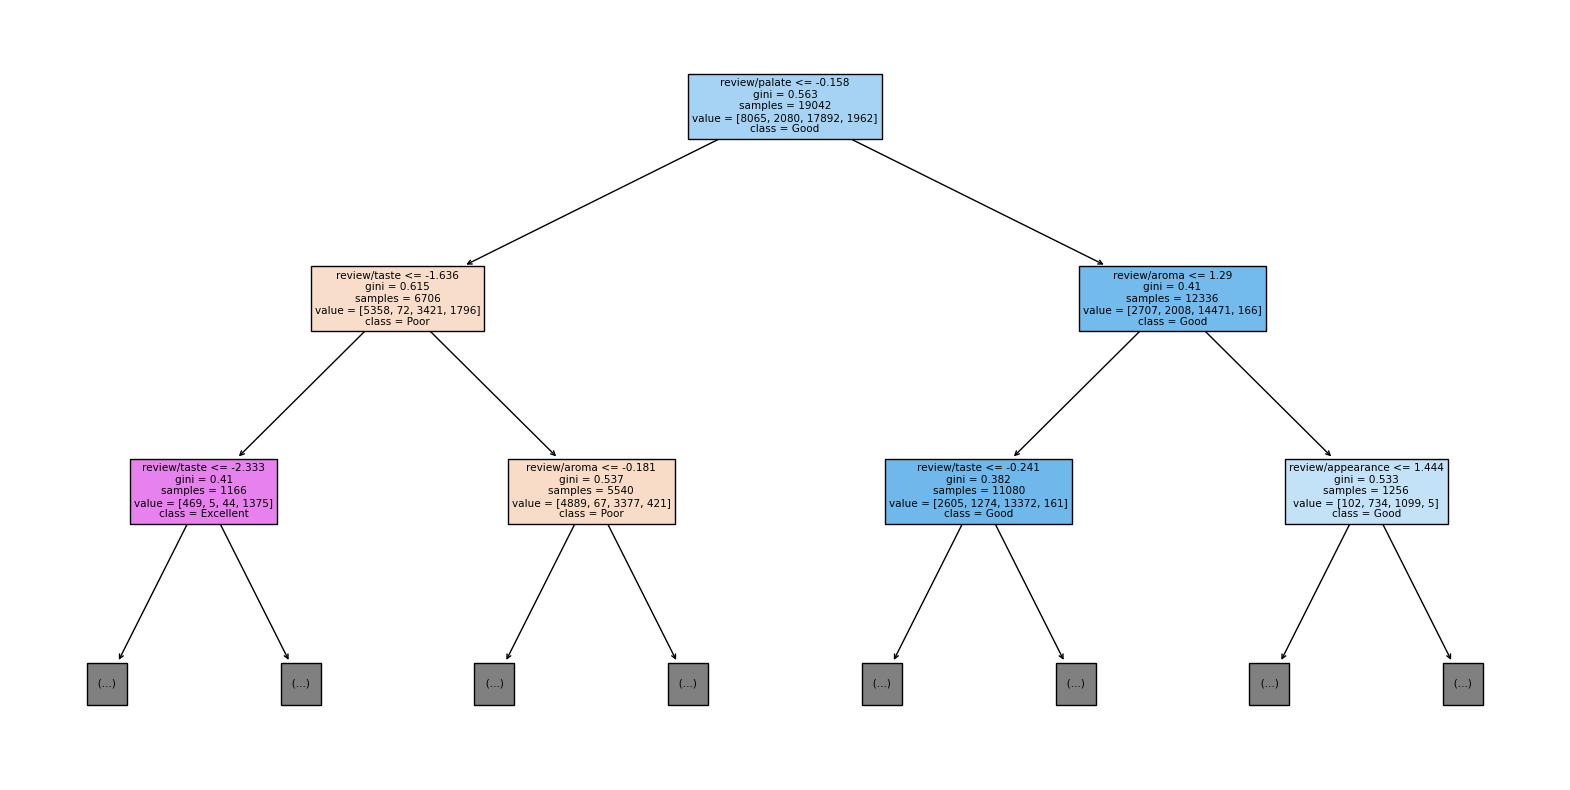

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Define thresholds for rating classes
thresholds = [0, 2.5, 3.5, 4.5, 5]
# Labels for rating classes
labels = ['Poor', 'Average', 'Good', 'Excellent']

# Classify ratings into classes based on thresholds
df['rating_class'] = pd.cut(df['review/overall'], bins=thresholds, labels=labels)

# Drop rows with NaN values in 'rating_class' column
df = df.dropna(subset=['rating_class'])

# Features and target variable
X = df[['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'compound_score']]
y = df['rating_class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)
best_rf_classifier = random_search.best_estimator_

# Make predictions
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
import matplotlib.pyplot as plt

# Plot the distribution of beer ratings
plt.figure(figsize=(8, 6))
df['rating_class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Beer Ratings')
plt.xlabel('Rating Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print some sample ratings
print("Sample Beer Ratings:")
print(df[['beer/name', 'beer/style', 'beer/ABV', 'review/overall', 'rating_class']].head(10))
from sklearn.tree import plot_tree

# Get one of the decision trees from the Random Forest
tree = best_rf_classifier.estimators_[0]

# Plot the decision tree with limited depth and a subset of features
plt.figure(figsize=(20, 10))
plot_tree(tree, max_depth=2, feature_names=list(X.columns), class_names=labels, filled=True)
plt.show()


Accuracy: 0.7473333333333333
Classification Report:
               precision    recall  f1-score   support

     Average       0.71      0.57      0.63      2002
   Excellent       0.00      0.00      0.00       533
        Good       0.75      0.93      0.83      4492
        Poor       0.82      0.62      0.71       473

    accuracy                           0.75      7500
   macro avg       0.57      0.53      0.54      7500
weighted avg       0.69      0.75      0.71      7500



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


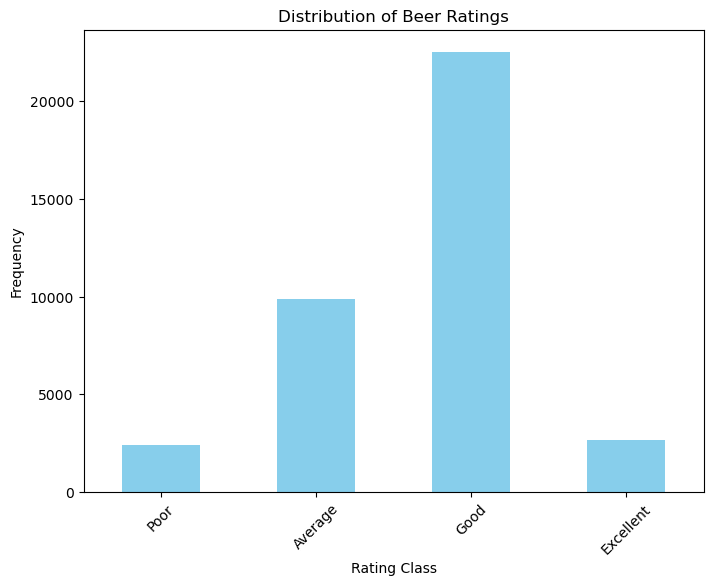

Sample Beer Ratings:
                             beer/name               beer/style  beer/ABV  \
0                             Chiostro     Herbed / Spiced Beer       5.0   
1             Bearded Pat's Barleywine      American Barleywine      11.0   
2                 Naughty Nellie's Ale  American Pale Ale (APA)       4.7   
3                      Pilsner Urquell           Czech Pilsener       4.4   
4            Black Sheep Ale (Special)         English Pale Ale       4.4   
5                      YouEnjoyMyStout   Russian Imperial Stout      10.0   
6                          Benevolence        American Wild Ale      12.6   
7     Frog's Hollow Double Pumpkin Ale              Pumpkin Ale       8.4   
8  Stoudt's Barrel Aged Old Abominable       English Barleywine       9.0   
9                   One Hop Wonder IPA             American IPA       6.2   

   review/overall rating_class  
0             4.0         Good  
1             3.5      Average  
2             3.5      Average  

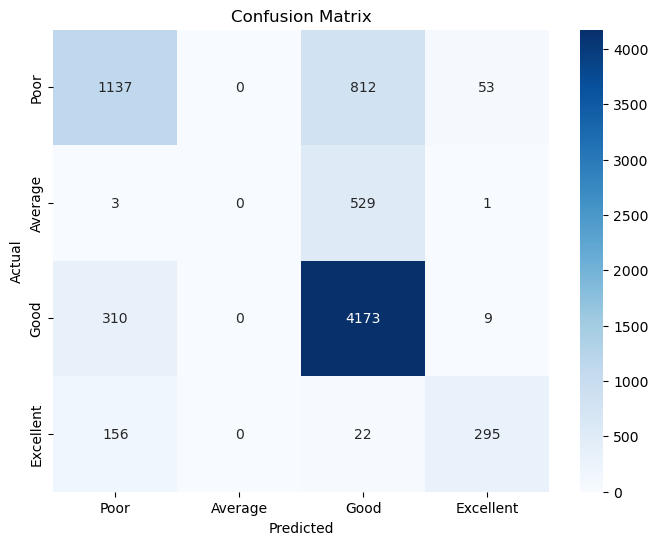

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Features and target variable
X = df[['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'compound_score']]
y = df['rating_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot the distribution of beer ratings
plt.figure(figsize=(8, 6))
df['rating_class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Beer Ratings')
plt.xlabel('Rating Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Print some sample ratings
print("Sample Beer Ratings:")
print(df[['beer/name', 'beer/style', 'beer/ABV', 'review/overall', 'rating_class']].head(10))
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
